# Técnica de agrupamiento (Clustering) Jearárquico | CMC
## Enlace Simple
## Enlace Completo
## MAXMIN

En este documento se presentan las técnicas de agrupamiento no supervisado, tambien conocido como "clustering".
Se propone el uso de la siguiente base de datos con la siguiente información:
1. Title: Contraceptive Method Choice
2. Sources:
   (a) Origin:  This dataset is a subset of the 1987 National Indonesia
                Contraceptive Prevalence Survey
   (b) Creator: Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Date:    June 7, 1997
4. Relevant Information:
   This dataset is a subset of the 1987 National Indonesia Contraceptive
   Prevalence Survey. The samples are married women who were either not 
   pregnant or do not know if they were at the time of interview. The 
   problem is to predict the current contraceptive method choice 
   (no use, long-term methods, or short-term methods) of a woman based 
   on her demographic and socio-economic characteristics.
5. Number of Instances: 1473
6. Number of Attributes: 10 (including the class attribute)
7. Attribute Information:
   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use 
                                                        2=Long-term
                                                        3=Short-term
8. Missing Attribute Values: None

In [1]:
#sección de importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
#librerias especializadas
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import pdist,squareform
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import linkage,dendrogram
#estandarizar conjunto de datos
from sklearn.preprocessing import StandardScaler

In [2]:
sc = StandardScaler()
cmc = pd.read_csv('../datasets/Contraceptive Method Choice/contraceptive_method_weka_dataset.csv')
data = cmc.columns.values.tolist()[:-1] #tomamos todos los nombres de las columnas, menos la última
target = cmc.columns.values.tolist()[-1]#tomamos el nombre de la ultima columna
X,y = cmc[data],cmc[target] #separacion del dataset en caracteristicas y clase
X_std = pd.DataFrame(sc.fit_transform(X),columns=data) #caracteristicas estandarizadas
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20,random_state=0) #partición 80-20 retorna DataFrames
X_train_std,X_test_std,y_train_std,y_test_std= train_test_split(X_std,y,test_size=.20,random_state=0) #partición 80-20

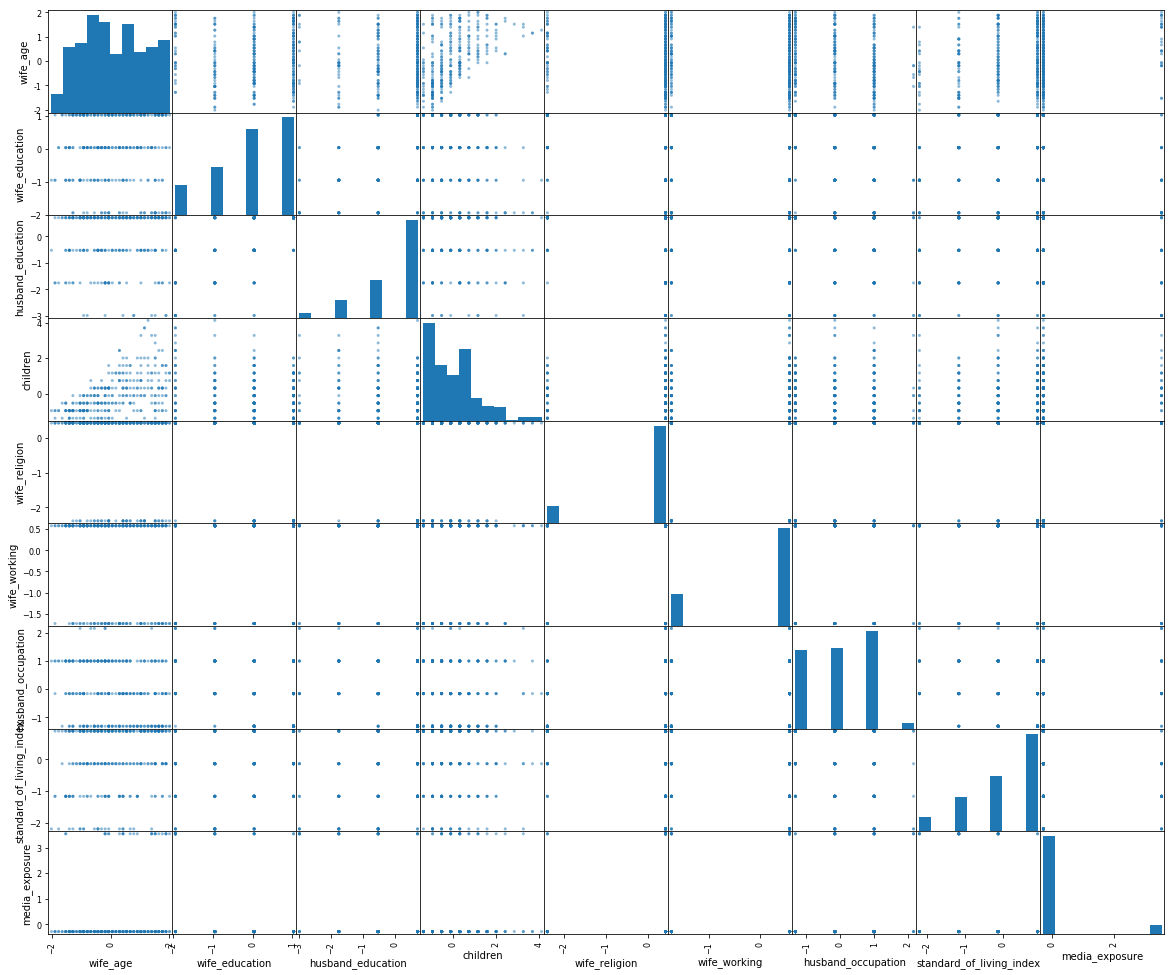

In [3]:
#Tabla que muestra la distribución de las caracteristicas estandarizadas
pd.plotting.scatter_matrix(X_test_std,figsize=(20,17))
plt.show()

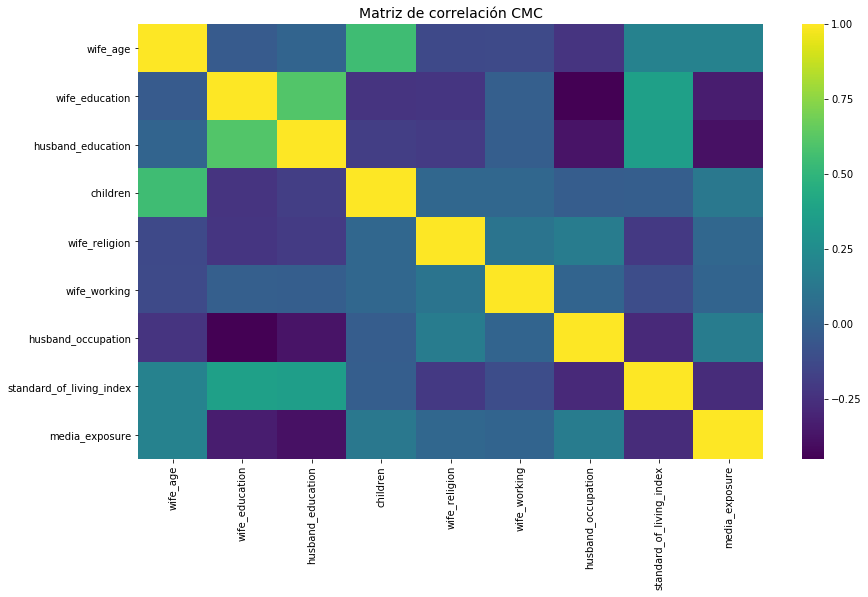

In [5]:
#Matriz de correlación datos STD de Iris Plant, Entre mas obscuro menor correlación
fig = plt.figure()
fig.set_size_inches(14,8)
ax = fig.add_subplot(111)
ax.set_title('Matriz de correlación CMC', fontdict={'fontsize': 14, 'fontweight': 'medium'})
sbs.heatmap(X_test_std.corr(),xticklabels=X_std.columns.values,yticklabels=X_std.columns.values,cmap='viridis')
plt.show()

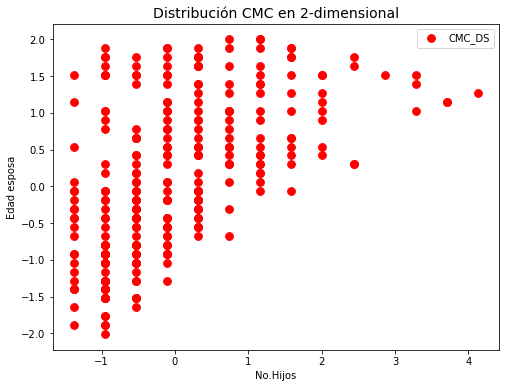

In [6]:
#mostrando distribución de los datos a partir de las caract. menos correlacionadas
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(111)
ax.set_title('Distribución CMC en 2-dimensional', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.scatter(x=X_test_std['children'],y=X_test_std['wife_age'],c='red',s=60,marker='o')
plt.xlabel('No.Hijos')
plt.ylabel('Edad esposa')
plt.legend(["CMC_DS"],loc='best')
plt.show()

# Método de enlace simple

In [11]:
#funcion para guardar las predicciones
def agg_to_csv(data,num_cluster,metrica,enlace,carpeta,nom_arch,ext):
    from sklearn.cluster import AgglomerativeClustering
    cluster = AgglomerativeClustering(n_clusters=num_cluster,affinity=metrica,linkage=enlace)
    c_predict= cluster.fit_predict(data)
    guardar = pd.DataFrame(data)
    guardar['cluster'] = pd.DataFrame(c_predict)
    guardar['cluster'] = guardar['cluster'].replace([0],3) #reemplazar el 0 por 3
    guardar.to_csv('../datasets/'+carpeta+'/'+str(nom_arch)+str(ext),index=False)

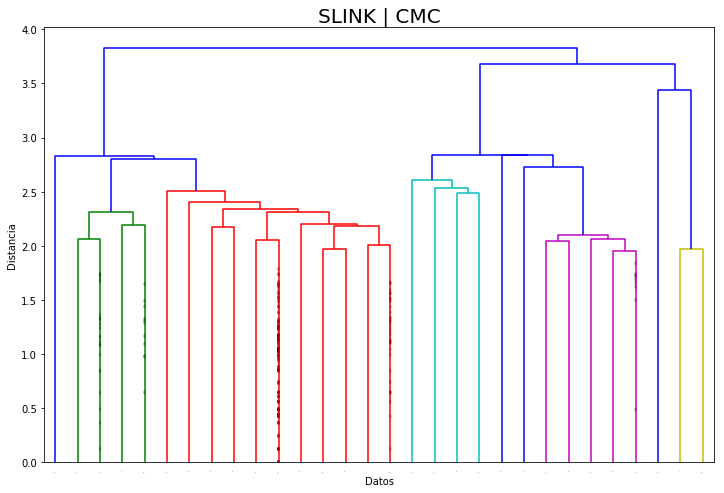

In [12]:
#configuracion del archivo
carpeta_CMC = 'Cluster_Datasets'
nombre_archivo = 'CMC_SLINK_nuevo'
extension = '.csv'
#print('../datasets/'+carpeta_CMC+'/'+nombre+extension)
#--------------------------------------------------------------
#The distance function can be cityblock, euclidean, mahalanobis, minkowski...mas en función
#configuracion clustering
metrica = 'euclidean' #metrica de distancia
enlace = 'single'   #otros complete,ward,average
num_cluster = 3
den_title = 'SLINK | CMC' #titulo para el dendograma
xlabel = 'Datos'
ylabel = 'Distancia'
#--------------------------------------------------------------
ma_distancia = pdist(X=X_test_std,metric=metrica) #matriz distancia
dist_ma_comp = pd.DataFrame(squareform(X=ma_distancia,force='no',checks=True)) #Matriz completa
#--------------------------------------------------------------
#Generando enlace simple
slink_std = linkage(X_test_std,method=enlace,metric=metrica)
#--------------------------------------------------------------
#mostrando dendograma formado
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title(den_title, fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xlabel(xlabel)
plt.ylabel(ylabel)
dendrogram(slink_std,leaf_rotation=90.,leaf_font_size=0.8,truncate_mode='lastp',show_contracted=True,show_leaf_counts=True)
plt.show()
#--------------------------------------------------------------
#Generando nuevo DS prediccion cluster
agg_to_csv(data=X_std,num_cluster=num_cluster,
           metrica=metrica,enlace='ward',carpeta=carpeta_CMC,nom_arch=nombre_archivo,ext=extension)

# Método enlace completo

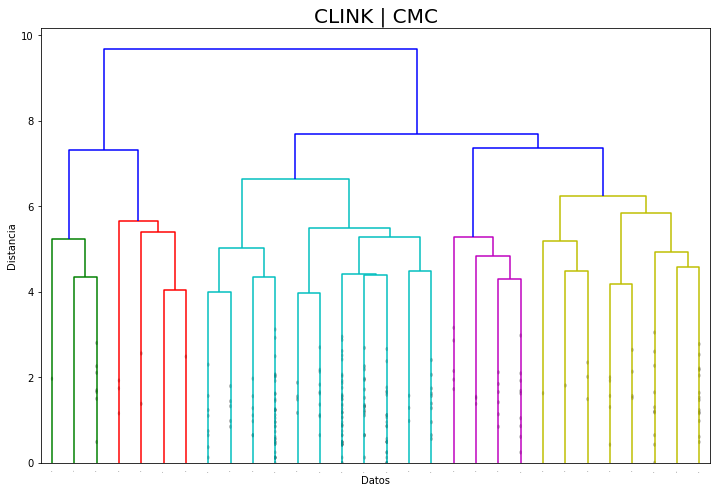

In [13]:
#configuracion del archivo
carpeta_CMC = 'Cluster_Datasets'
nombre_archivo = 'CMC_CLINK_nuevo'
extension = '.csv'
#print('../datasets/'+carpeta_CMC+'/'+nombre+extension)
#--------------------------------------------------------------
#The distance function can be cityblock, euclidean, mahalanobis, minkowski...mas en función
#configuracion clustering
metrica = 'euclidean' #metrica de distancia
enlace = 'complete'   #otros complete,ward,average
num_cluster = 3
den_title = 'CLINK | CMC' #titulo para el dendograma
xlabel = 'Datos'
ylabel = 'Distancia'
#--------------------------------------------------------------
ma_distancia = pdist(X=X_test_std,metric=metrica) #matriz distancia
dist_ma_comp = pd.DataFrame(squareform(X=ma_distancia,force='no',checks=True)) #Matriz completa
#--------------------------------------------------------------
#Generando enlace simple
slink_std = linkage(X_test_std,method=enlace,metric=metrica)
#--------------------------------------------------------------
#mostrando dendograma formado
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title(den_title, fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xlabel(xlabel)
plt.ylabel(ylabel)
dendrogram(slink_std,leaf_rotation=90.,leaf_font_size=0.8,truncate_mode='lastp',show_contracted=True,show_leaf_counts=True)
plt.show()
#--------------------------------------------------------------
#Generando nuevo DS prediccion cluster
agg_to_csv(data=X_std,num_cluster=num_cluster,
           metrica=metrica,enlace='complete',carpeta=carpeta_CMC,nom_arch=nombre_archivo,ext=extension)

# Método MAXMIN

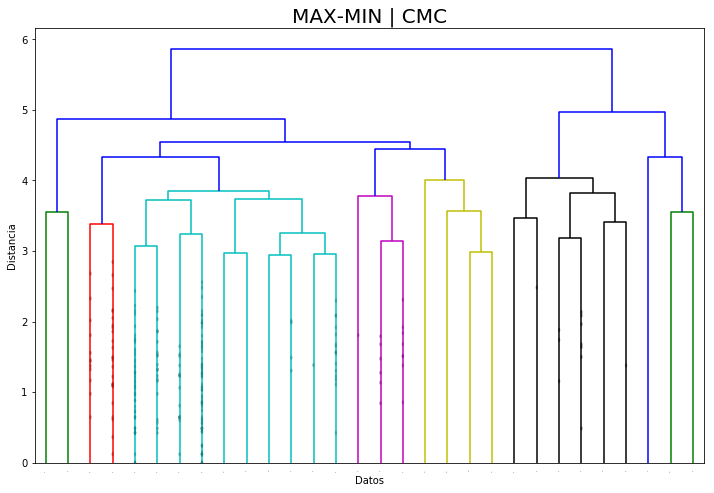

In [14]:
#configuracion del archivo
carpeta_CMC = 'Cluster_Datasets'
nombre_archivo = 'CMC_MAXMIN_nuevo'
extension = '.csv'
#print('../datasets/'+carpeta_CMC+'/'+nombre+extension)
#--------------------------------------------------------------
#The distance function can be cityblock, euclidean, mahalanobis, minkowski...mas en función
#configuracion clustering
metrica = 'euclidean' #metrica de distancia
enlace = 'average'   #otros complete,ward,average
num_cluster = 3
den_title = 'MAX-MIN | CMC' #titulo para el dendograma
xlabel = 'Datos'
ylabel = 'Distancia'
#--------------------------------------------------------------
ma_distancia = pdist(X=X_test_std,metric=metrica) #matriz distancia
dist_ma_comp = pd.DataFrame(squareform(X=ma_distancia,force='no',checks=True)) #Matriz completa
#--------------------------------------------------------------
#Generando enlace simple
slink_std = linkage(X_test_std,method=enlace,metric=metrica)
#--------------------------------------------------------------
#mostrando dendograma formado
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title(den_title, fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xlabel(xlabel)
plt.ylabel(ylabel)
dendrogram(slink_std,leaf_rotation=90.,leaf_font_size=0.8,truncate_mode='lastp',show_contracted=True,show_leaf_counts=True)
plt.show()
#--------------------------------------------------------------
#Generando nuevo DS prediccion cluster
agg_to_csv(data=X_std,num_cluster=num_cluster,
           metrica=metrica,enlace='average',carpeta=carpeta_CMC,nom_arch=nombre_archivo,ext=extension)